In [6]:
import numpy as np
from matplotlib import pyplot as plt

# Linear Regression

Linear regression is a classic method of fitting a line to a set of data. It can be extended to fitting any curve with linear coefficients.

## Basic Algebra

A line can be defined using this standard equation:

$$y = a x + b$$

Where $a$ is the slope and $b$ is the y-intercept. Given two sets of points $x_1, y_1 and x_2, y_2$, we have two equations with two unknowns. It is then possible to solve for $a$ and $b$ explicitly.

For example, given the points 2, 1 and 3, 3, we can visualize these points:

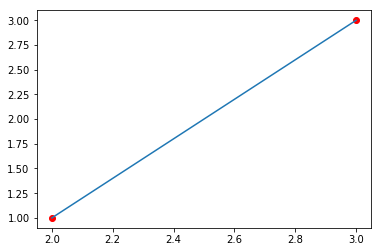

In [4]:
(x1, y1) = (2, 1)
(x2, y2) = (3, 3)

plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')
plt.plot([x1, x2], [y1, y2])
plt.show()

To solve for constants $a$ and $b$, we can write these two equations:

$$1 = 2 a + b$$

$$3 = 3 a + b$$

Using basic algebra, we find the values for $a$ and $b$ are:

$$a = 2$$

$$b = -3$$

Redrawing the graph with the y-intercept:

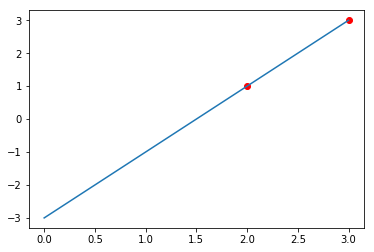

In [5]:
a = 2
b = -3

plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')
plt.plot([0, x2], [b, y2])
plt.show()

## Linear Algebra

The problem above can be abstracted using [linear algebra](https://en.wikipedia.org/wiki/Linear_algebra). The system of equations above can be rewritten in matrix form:

$$1 = 2 a + b$$

$$3 = 3 a + b$$

$$ \begin{bmatrix}
1 \\
3
\end{bmatrix} = \begin{bmatrix}
2 & 1 \\
3 & 1 \\
\end{bmatrix} \begin{bmatrix}
a \\
b
\end{bmatrix}$$

This can be written more generally as matrix equation

$$y = A v$$

Where $A$ is a matrix and $v$ is a vector.

To solve for $a$ and $b$, consider how we would solve a simple equation such as

$$1 = 2 x$$

We could multiply both sides of the equation by the inverse of $2$, which $2^{-1}$

$$2^{-1} \times 1 = 2^{-1} \times 2 x$$

$2 \times 2^{-1}$ is obviously $1$, so

$$x = \frac{1}{2}$$

By analogy, multiplying the matrix equation above by the inverse of $A$ or $A^{-1}$ on both sides would look like this

$$y = A v$$

$$A^{-1} y = A^{-1} A v$$

The quantity $A A^{-1}$ becomes the [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix), so the vector $v$ would then be

$$v = A^{-1} y$$

NumPy contains methods to compute the inverse of a matrix.

In [16]:
A = np.array([[2, 1], [3, 1]])
A

array([[2, 1],
       [3, 1]])

In [17]:
Ainv = np.linalg.inv(A)
Ainv

array([[-1.,  1.],
       [ 3., -2.]])

In [19]:
y = np.array([1, 3])
Ainv.dot(y)

array([ 2., -3.])

Which is the same result as before with basic algebra.

## More Data

Consider the case when more than two data points are available.

Given a set of samples, $x_1, x_2, ... x_n$ and $y_1, y_2, ... y_n$, a simple linear model can be written as:

$$ y_i = a x_i + b\tag{1}$$

(1) can be rewritten in matrix form:

$$ \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix} = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix} \begin{bmatrix}
a \\
b
\end{bmatrix} \tag{2}$$

Introduce variables for simplification:

$$ y = \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix} \tag{3}$$

$$ A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix} \tag{4}$$

Substitute variables defined in (3) and (4) to produce a simplifed form of (2):

$$ y = A \begin{bmatrix}
a \\
b
\end{bmatrix} \tag{5}$$

If $A$ is a square matrix, i.e. $n = 2$, $a$ and $b$ can be determined exactly:

$$ \begin{bmatrix}
a \\
b
\end{bmatrix} = A^{-1} y \tag{6}$$

In the case where $n > 2$, $A$ is not square and cannot be inverted. One solution is to compute a pseudo-inverse by multiplying $A$ by it's transpose $A^T$, which will yield a square matrix on the right hand side:

$$ A^T y = A^T A \begin{bmatrix}
a \\
b
\end{bmatrix} \tag{7}$$

The matrix $A^T A$ on the right can be eliminated by multiplying by it's inverse $(A^T A)^{-1}$:

$$ (A^T A)^{-1} A^T y = (A^T A)^{-1} (A^T A) \begin{bmatrix}
a \\
b
\end{bmatrix} \tag{8} $$

Simplifying yields the result for $a$ and $b$:

$$ \begin{bmatrix}
a \\
b
\end{bmatrix} = (A^T A)^{-1} A^T y\tag{9}$$

## Model Accuracy

The accuracy of the model above can be measured by computing the mean squared error between predicted and training values:

$$ \epsilon = \frac{1}{m} \sum_{i=1}^{m} (a x_i + b - y_i)^2 $$

The prediction error can be computed in the same way, but using the test samples instead of the training samples.

Test error can be different and training error, for example:

- If training error is high, this is a case of __high bias__. This generally means the model is not powerful enough to fit the training data.
- If the training error is low, but the test error is high, this is a case of __high variance__. This usually often means the model is overfitting and does not generalize well with data it has not seen.

## Extending the Model

In the case where a straight line will not accurately fit the available data, a more complex mode can be used. For example, a quadratic model might be more suitable:

$$ y_i = a {x_i}^2 + b x_i + c \tag{10}$$

In matrix form:

$$ \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix} = \begin{bmatrix}
{x_1}^2 & x_1 & 1 \\
{x_2}^2 & x_2 & 1 \\
... \\
{x_n}^2 & x_n & 1
\end{bmatrix} \begin{bmatrix}
a \\
b \\
... \\
c
\end{bmatrix} \tag{11}$$

In this case the matrix $A$ is:

$$ A = \begin{bmatrix}
{x_1}^2 & x_1 & 1 \\
{x_2}^2 & x_2 & 1 \\
... \\
{x_n}^2 & x_n & 1
\end{bmatrix}\tag{12}$$

The same procedure can be used to find $a$, $b$, and $c$:

$$ \begin{bmatrix}
a \\
b \\
c
\end{bmatrix} = (A^T A)^{-1} A^T y \tag{13}$$